In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

In [128]:
df = pd.read_csv("UCMF_100.csv")

df.replace(0, np.nan, inplace=True)
df.describe(include='all')


,ID,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
count,99.000000,86.000000,75.000000,73.000000,97,97,95.000000,80,92,60.000000,...,97,94,94,94,90.000000,77,9,99,95,69
unique,NaN,NaN,NaN,NaN,93,94,NaN,30,1,NaN,...,6,2,4,3,NaN,7,4,3,4,12
top,NaN,NaN,NaN,NaN,11/05/06,29/03/91,NaN,UR,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,NaN,Assintomático,Dispneia,M,5 - Parecer cardiológico,5 - Cirurgia
freq,NaN,NaN,NaN,NaN,2,2,NaN,19,92,NaN,...,51,50,88,55,NaN,54,5,64,44,19
mean,50.000000,25.294186,112.906667,17.890411,NaN,NaN,6.546211,NaN,NaN,101.083333,...,NaN,NaN,NaN,NaN,92.011111,NaN,NaN,NaN,NaN,NaN
std,28.722813,16.928774,34.439596,3.285328,NaN,NaN,4.936142,NaN,NaN,11.647785,...,NaN,NaN,NaN,NaN,18.142689,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,50.000000,10.000000,NaN,NaN,-4.050000,NaN,NaN,80.000000,...,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN
25%,25.500000,13.000000,93.500000,16.000000,NaN,NaN,3.125000,NaN,NaN,90.000000,...,NaN,NaN,NaN,NaN,78.500000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,21.000000,116.000000,17.000000,NaN,NaN,5.990000,NaN,NaN,100.000000,...,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,NaN,NaN,NaN
75%,74.500000,36.450000,142.500000,20.000000,NaN,NaN,9.805000,NaN,NaN,106.250000,...,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


# Missing values

In [129]:
mv = np.where(pd.isnull(df))

print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")

rows with missing values: 97
columns with missing values: 19


One possible sollutuion for the missing data is data imputation in the code bellow we use the mean of the columns with numerical values and the mode of columns with non numerical values.

In [130]:
df2 = df.copy()
mv2 = np.where(pd.isnull(df2))

numerical_cols = df2.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df2[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df2.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df2[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv2 = np.where(pd.isnull(df2))
print(f"rows with missing values: {len(np.unique(mv2[0]))}")
print(f"columns with missing values: {len(np.unique(mv2[1]))}")

rows with missing values: 0
columns with missing values: 0


# Outliers
To deal with outliers we can user the quartiles: we calculate the inter quartile range and consider values that are 1.5 times or more bigger than q3 or 1.5 times or more smaller than q1 outliers and remove them

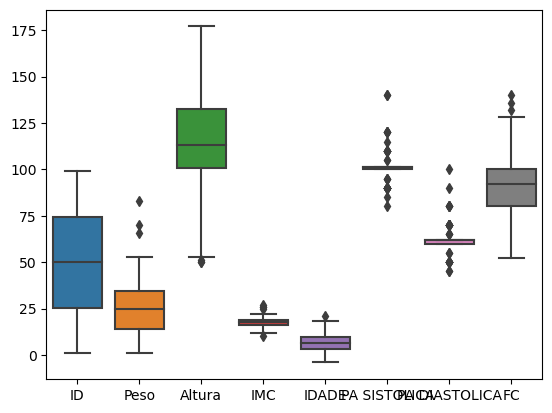

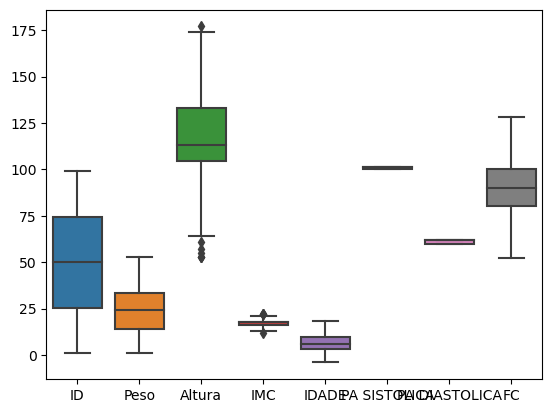

In [131]:
sns.boxplot(df2)
plt.show()

def remove_outliers(df):
    
    df_no_outliers = df.copy()
    numerical_cols = df_no_outliers.select_dtypes(include=[np.number])
    
    for col in numerical_cols.columns: 
        q1, q3 = np.percentile(df_no_outliers[col],[25,75])
        iqr = q3-q1
        df_no_outliers[col] = df_no_outliers[col][df_no_outliers[col]< q3 + 1.5*iqr] 
        df_no_outliers[col] = df_no_outliers[col][df_no_outliers[col]> q1 - 1.5*iqr] 
    
    return df_no_outliers

df2 = remove_outliers(df2)

sns.boxplot(df2)
plt.show()


# Data reduction
In this data we can see that the column ID would not be of any value to us so we can remove it making the data smaller

In [132]:
if 'ID' in df2:
    df2 =df2.drop('ID',axis=1)
    
df2.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,96.000000,96.000000,94.000000,98.000000,62.000000,65.000000,96.000000
mean,23.807546,114.862083,17.629263,6.396988,100.681452,61.150000,90.636458
std,13.453346,28.220251,2.183497,4.624364,0.527591,0.946278,15.652985
min,1.000000,53.000000,12.000000,-4.050000,100.000000,60.000000,52.000000
25%,14.000000,104.750000,16.000000,3.137500,100.000000,60.000000,80.000000
50%,24.300000,112.906667,17.890411,6.175000,101.083333,61.916667,90.000000
75%,33.625000,133.000000,18.000000,9.592500,101.083333,61.916667,100.000000
max,53.000000,177.000000,22.000000,18.360000,101.083333,61.916667,128.000000


# Normalization
To help our models achieve better results we can normalize the data so calculating the distance using different columns is easier

In [133]:
numerical_cols = df2.select_dtypes(include=[np.number])
for col in numerical_cols.columns: 
    df2[col] = df2[col]  / df2[col].abs().max() 

df2.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,96.000000,96.000000,94.000000,98.000000,62.000000,65.000000,96.000000
mean,0.449199,0.648938,0.801330,0.348420,0.996024,0.987618,0.708097
std,0.253837,0.159436,0.099250,0.251872,0.005219,0.015283,0.122289
min,0.018868,0.299435,0.545455,-0.220588,0.989283,0.969044,0.406250
25%,0.264151,0.591808,0.727273,0.170888,0.989283,0.969044,0.625000
50%,0.458491,0.637891,0.813200,0.336329,1.000000,1.000000,0.703125
75%,0.634434,0.751412,0.818182,0.522467,1.000000,1.000000,0.781250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
df2.to_csv("new_data.csv")